# <font color=red>other</font>

In [1]:
! pip install missingno


# Dataset Analysis

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

######################################

import numpy as np
import scipy.stats as sc
import pandas as pd

import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
from IPython.display import display

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from statsmodels.stats import outliers_influence as oi

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn import metrics 


#######################################################

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
#from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

######################################

#from sklearn.datasets import load_iris
from sklearn import preprocessing

from scipy import interp
from sklearn import datasets, neighbors
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler, \
 InstanceHardnessThreshold, RepeatedEditedNearestNeighbours,NeighbourhoodCleaningRule


from imblearn.pipeline import make_pipeline

######################################
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 250)
sns.set()

## Basic Info

In [3]:
dsdata = pd.read_excel('Data/full_dataset.xlsx')
dsdata = dsdata.replace('unknown', np.nan)
dsdata = dsdata.replace('nonexistent', np.nan)

dsdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
dsdata.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## Input variables:
#### bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Variable Description

In [5]:
#describe the "Object" type elements

dsdata.describe(include=['O']) 

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,40858,41108,39457,32591,40198,40198,41188,41188,41188,5625,41188
unique,11,3,7,2,2,2,2,10,5,2,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,failure,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,4252,36548


In [6]:
#describe the "numerical" type elements

dsdata.describe() 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
dsdata['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

## Variable Distribution

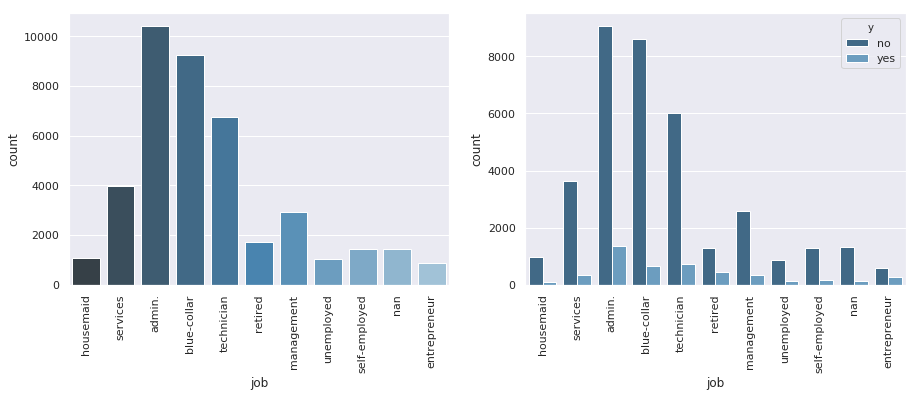

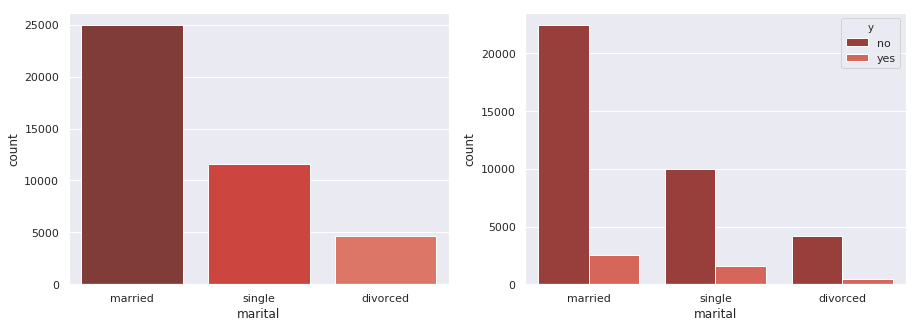

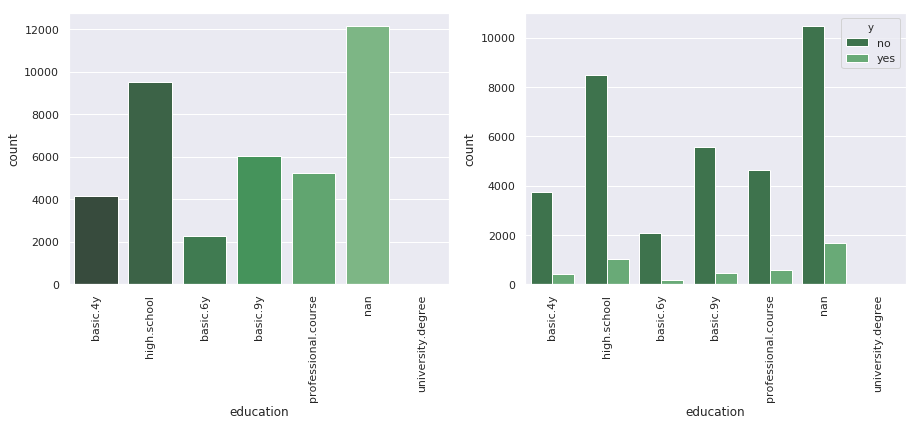

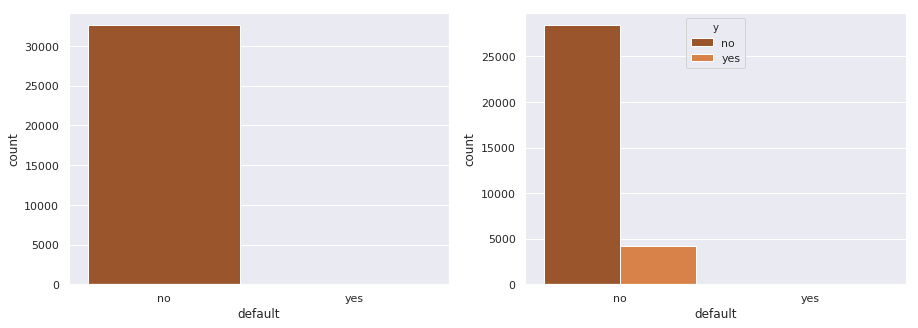

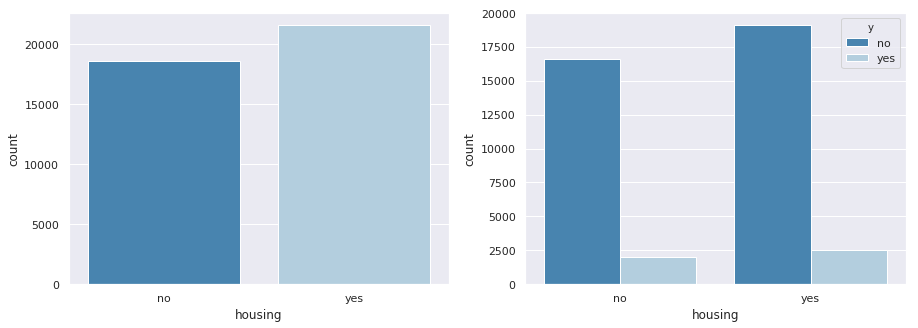

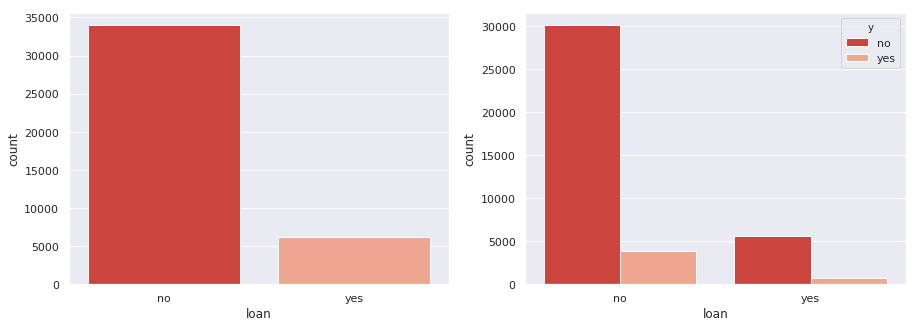

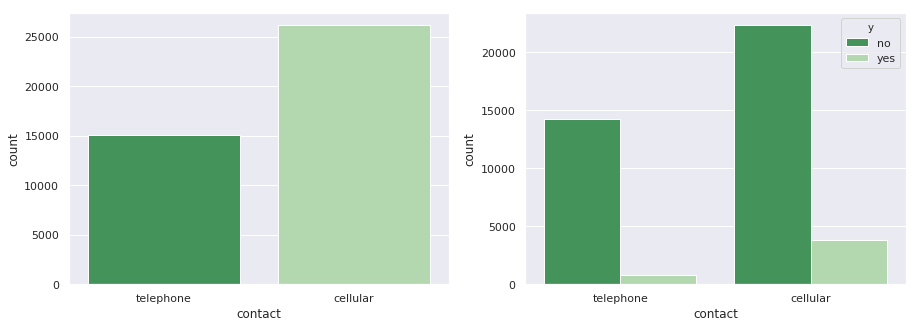

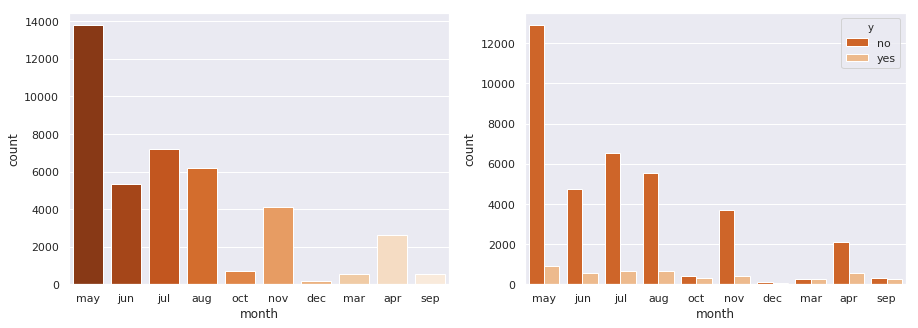

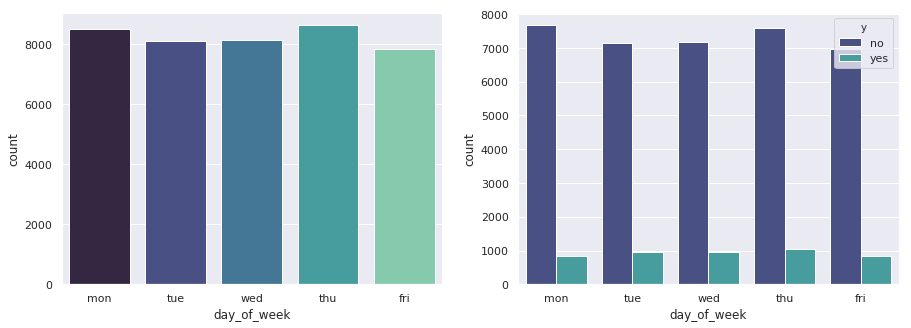

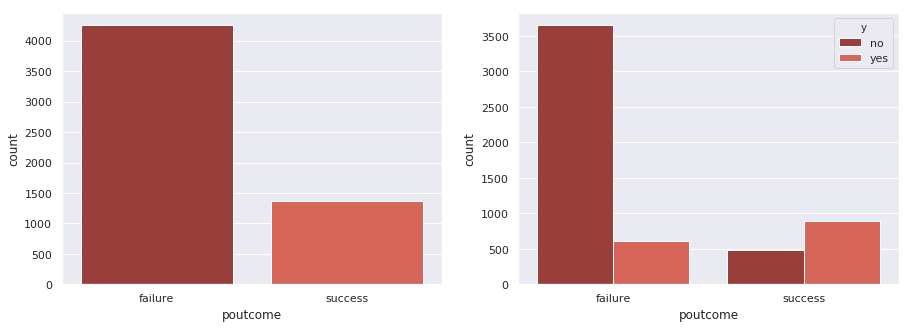

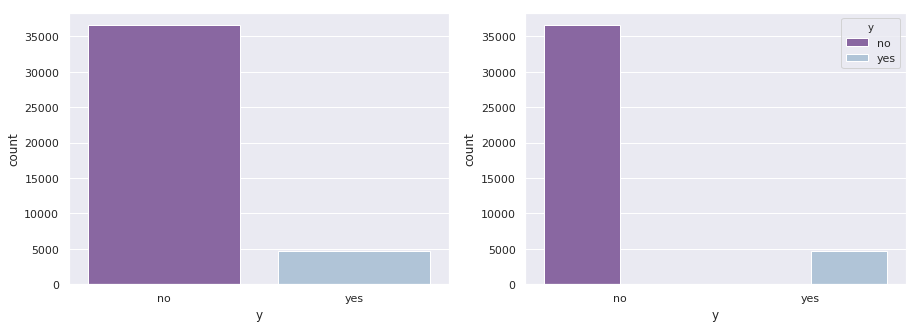

In [8]:
# Barplots for categorical (object) variables
column = "job"
colors = ['Blues_d', 'Reds_d', 'Greens_d', 'Oranges_d', 'Blues_r', 'Reds_r', 'Greens_r', 'Oranges_r', 'mako', 'Reds_d','BuPu_r']
color_coef=0
for column in dsdata.columns:
    if dsdata[column].dtype == "O":
        if column=='job' or column=='education':
            fig,ax=plt.subplots(1,2,figsize=(15,5))
            t = sns.countplot(x=column, data=dsdata, palette=colors[color_coef], ax=ax[0])
            t = t.set_xticklabels(dsdata[column].unique(), rotation=90)
            g = sns.countplot(x=dsdata[column], hue=dsdata['y'], palette=colors[color_coef], ax=ax[1])
            t = g.set_xticklabels(dsdata[column].unique(), rotation=90)
        else:
            fig,ax=plt.subplots(1,2,figsize=(15,5))
            t = sns.countplot(x=column, data=dsdata, palette=colors[color_coef], ax=ax[0])
            g = sns.countplot(x=dsdata[column], hue=dsdata['y'], palette=colors[color_coef], ax=ax[1])
        color_coef +=1

In [9]:
def histogram(variable):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram for {}".format(variable))
    ax = sns.distplot(dsdata[variable],color=sns.color_palette("RdYlGn_r")[0])
    
def histogram_by_deposit(feature):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram for {} with deposit".format(feature))
    ax0 = sns.distplot(dsdata[dsdata["y"]=="no"][feature],color=sns.color_palette("Pastel2")[0],label="deposit_No")
    ax1 = sns.distplot(dsdata[dsdata["y"]=="yes"][feature],color=sns.color_palette("Pastel2")[2],label="deposit_Yes")
    plt.legend()

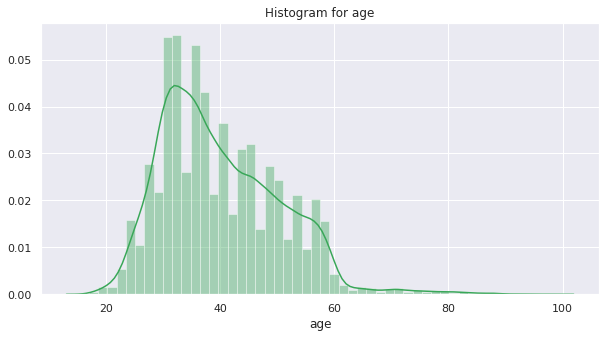

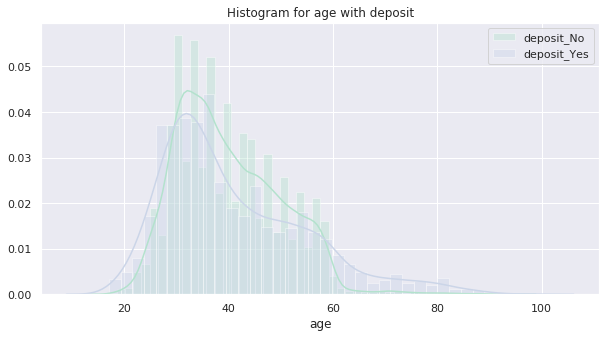

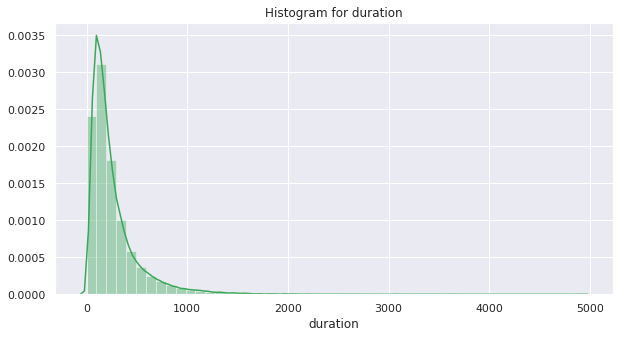

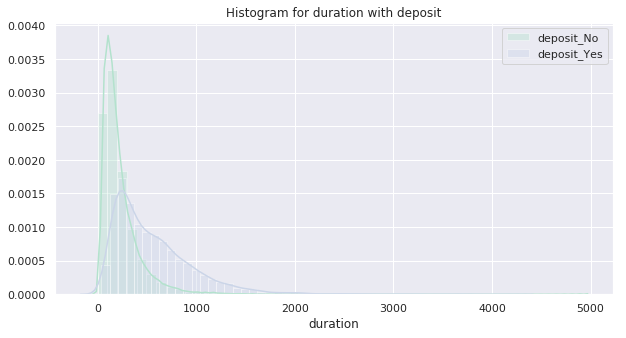

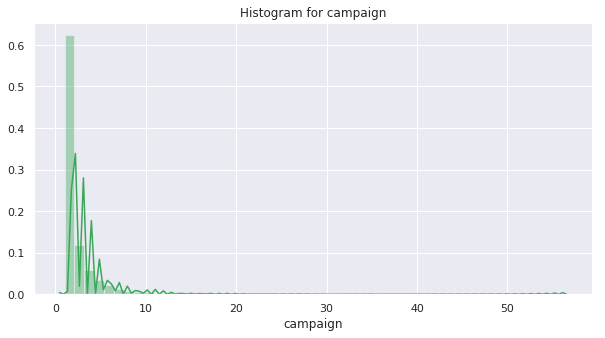

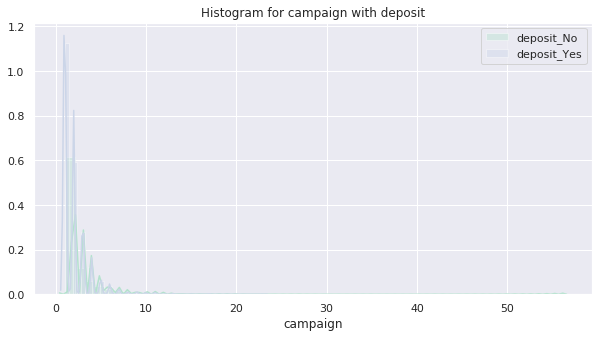

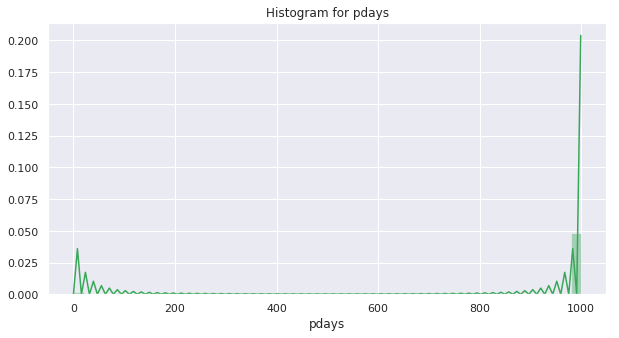

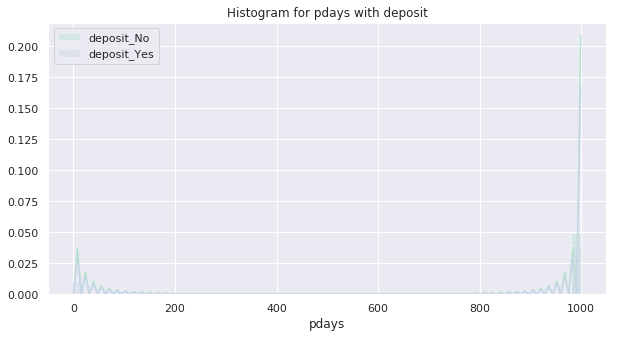

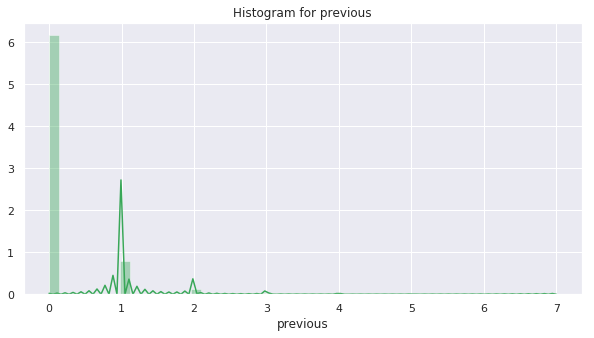

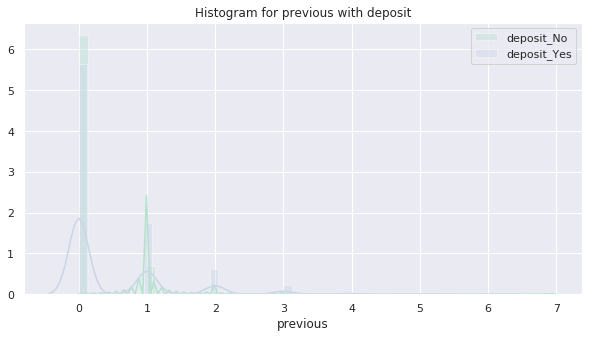

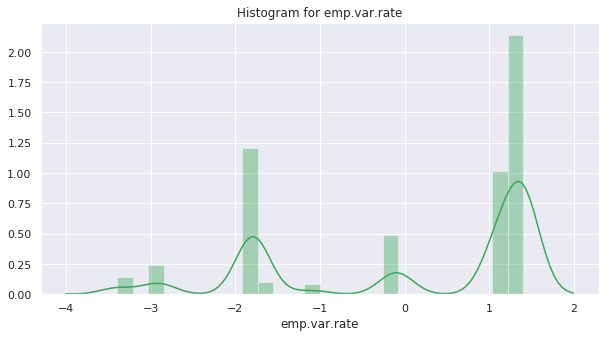

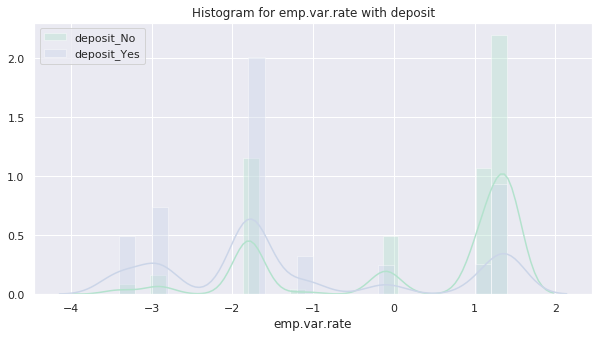

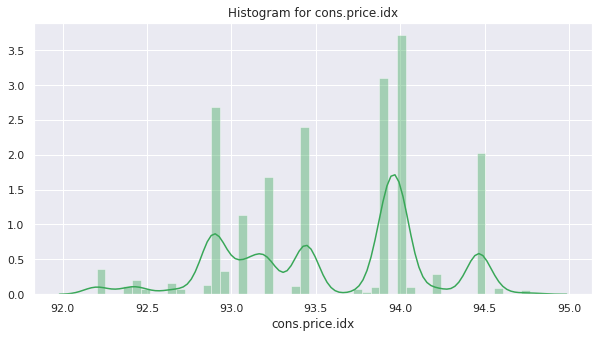

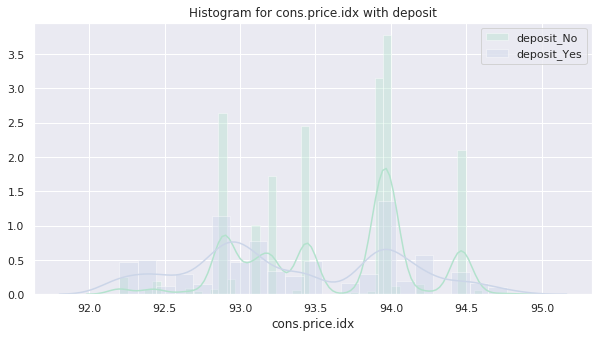

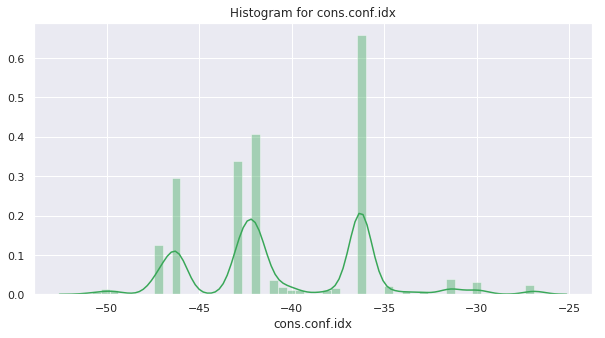

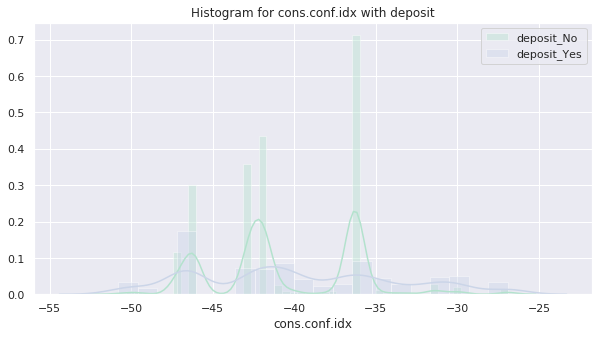

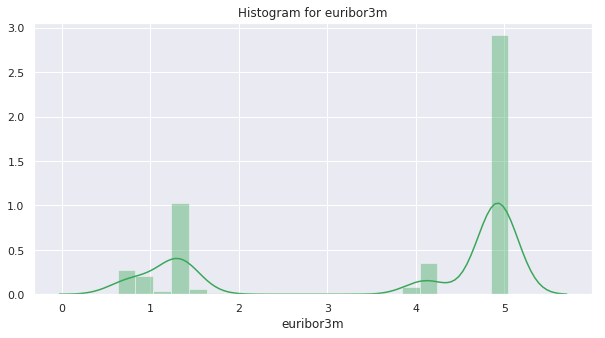

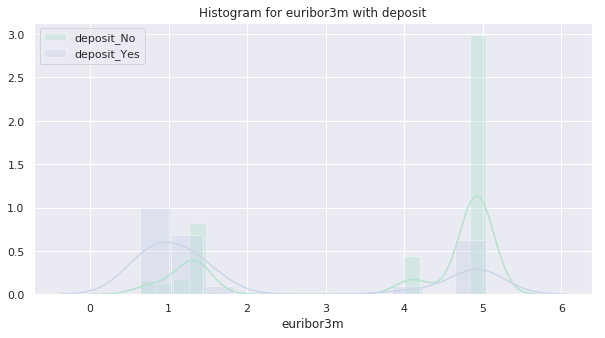

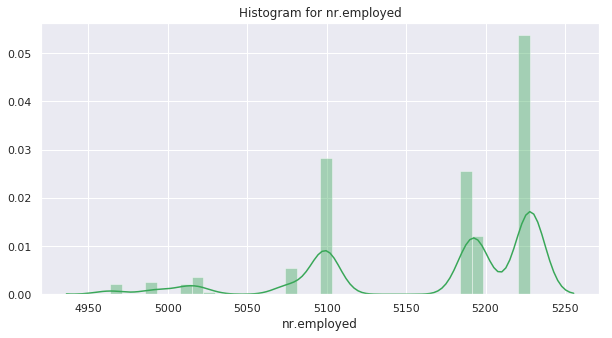

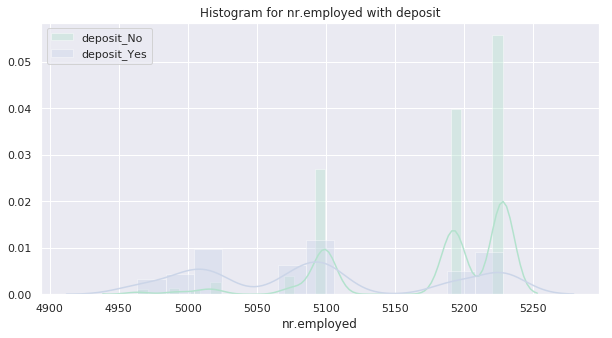

In [10]:
# histogram for numerical variables
column = "job"
for column in dsdata.columns:
    if dsdata[column].dtype == "int64" or dsdata[column].dtype == "float64":
        histogram(column)
        histogram_by_deposit(column)

# Missing Data Handling

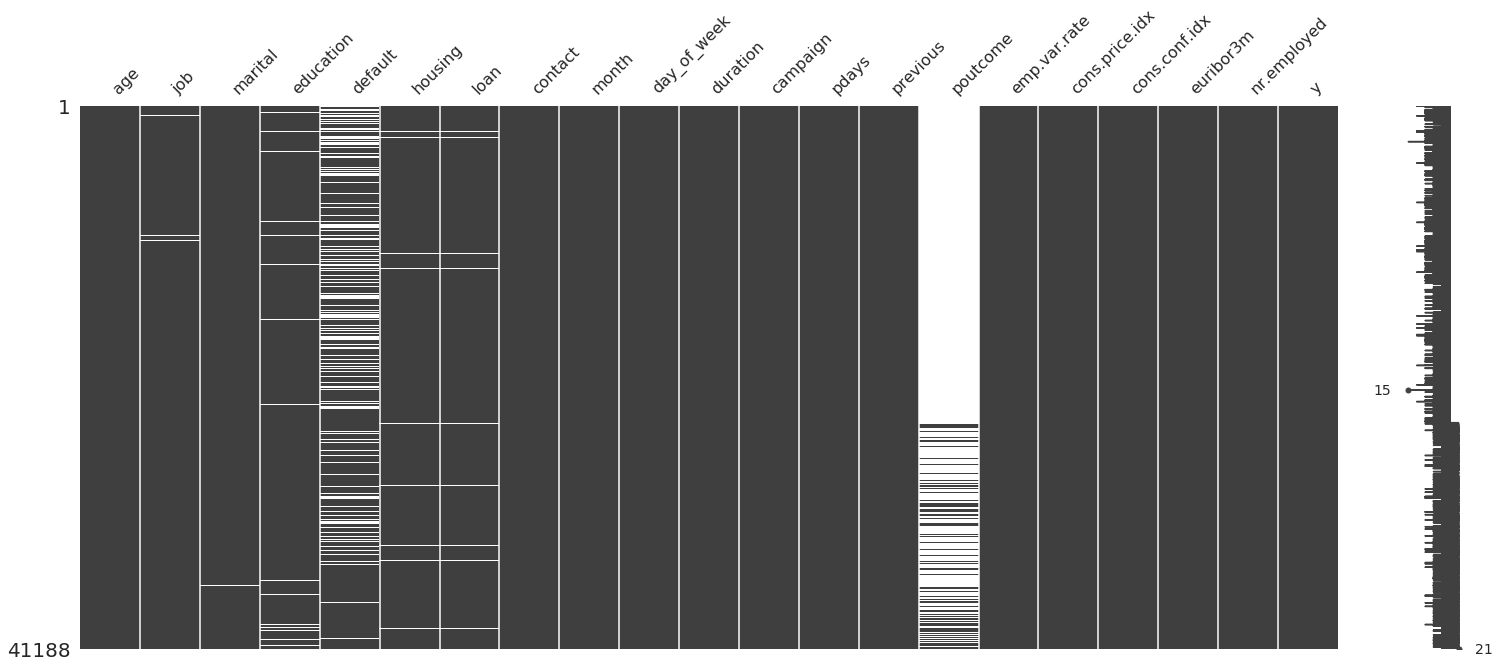

In [11]:
#visualizing missing data

msno.matrix(dsdata) 
plt.show()

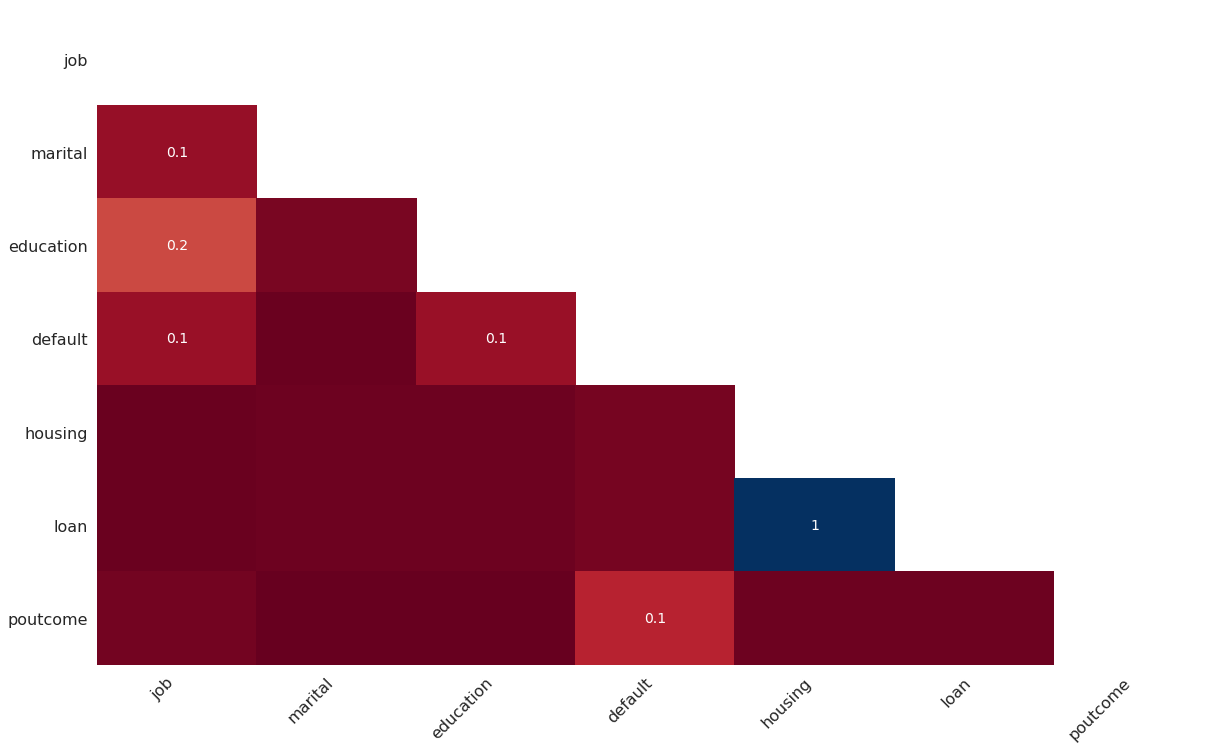

In [12]:
#nullity correlation: how strongly the presence or absence of one variable affects the presence of another
msno.heatmap(dsdata)
plt.show()
missing = ['job','marital','education','default','housing','loan','poutcome']
ds_missing = dsdata[missing]

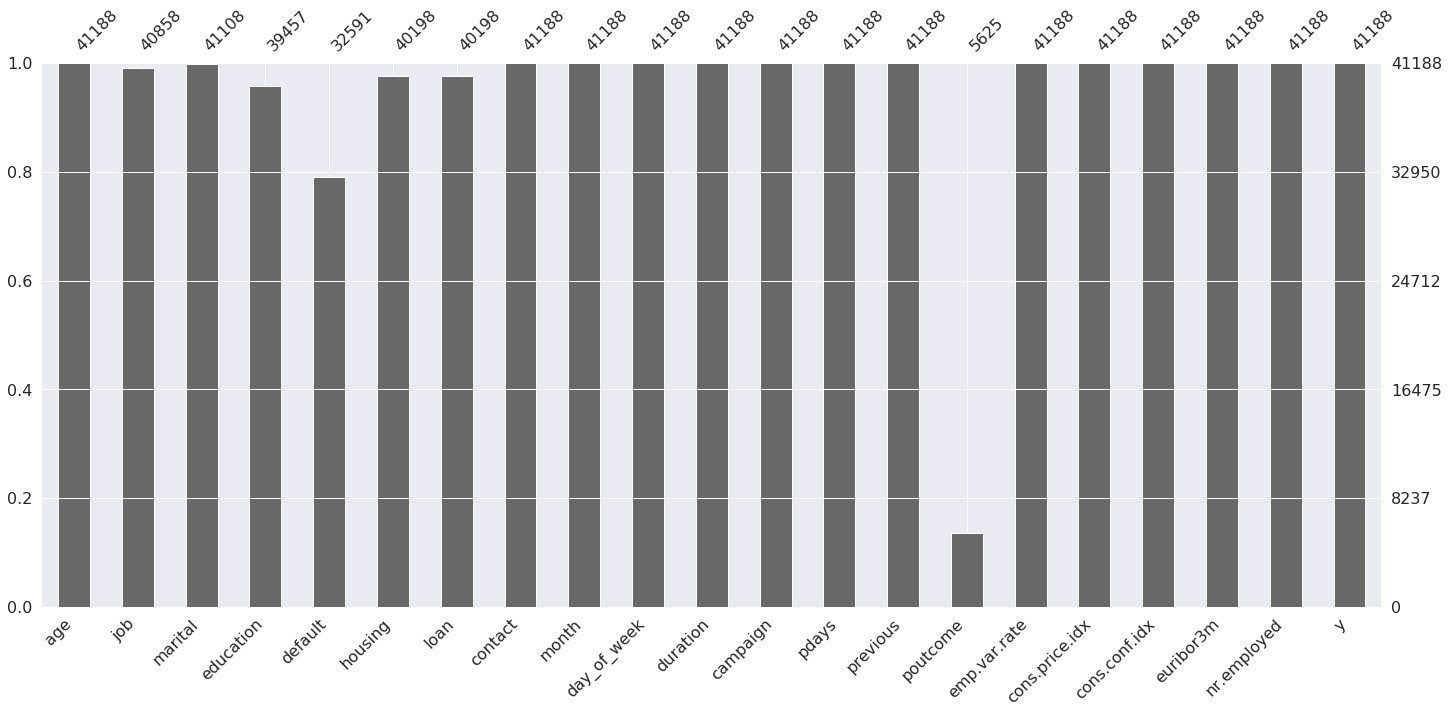

In [13]:
msno.bar(dsdata)
plt.show()

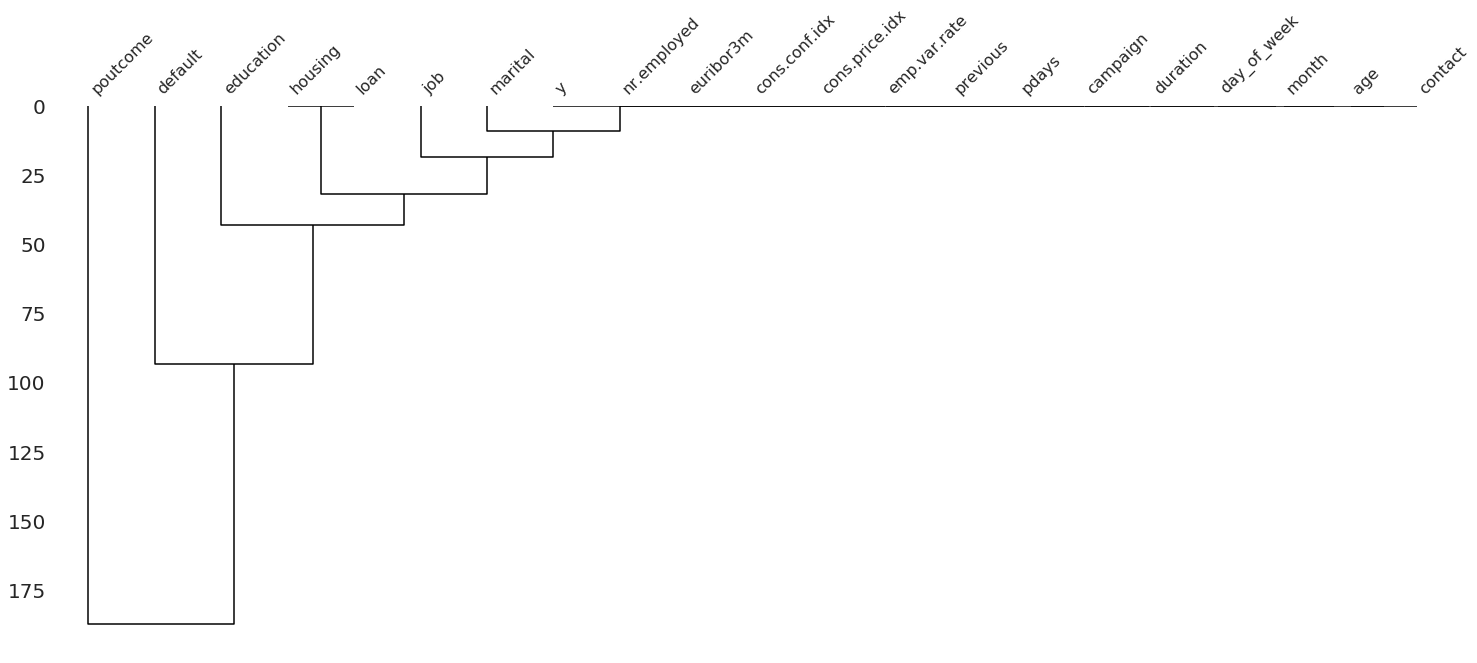

In [14]:
msno.dendrogram(dsdata)
plt.show()

In [15]:
#ds_missing.head(25)

In [16]:
for col in list(ds_missing.columns):
    print(ds_missing[col].value_counts(),'\n')

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64 

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64 

no     32588
yes        3
Name: default, dtype: int64 

yes    21576
no     18622
Name: housing, dtype: int64 

no     33950
yes     6248
Name: loan, dtype: int64 

failure    4252
success    1373
Name: poutcome, dtype: int64 



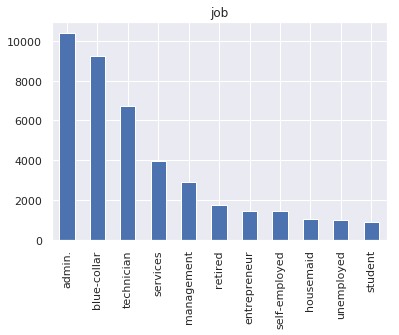

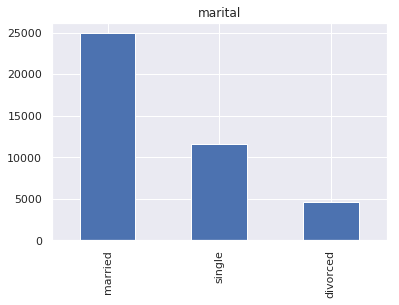

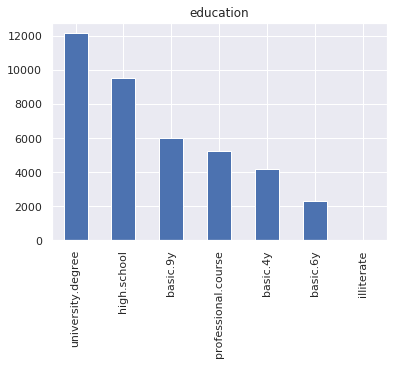

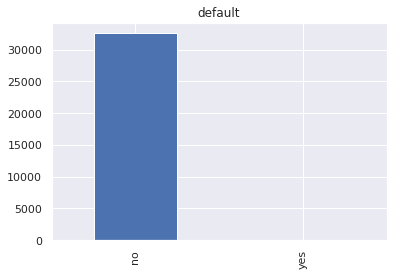

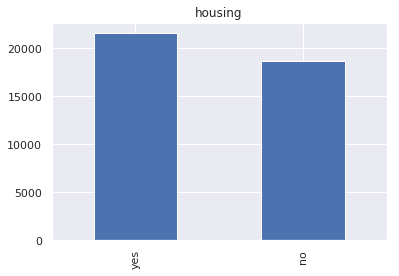

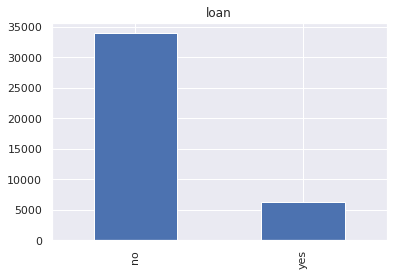

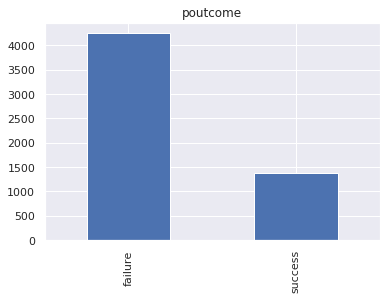

In [17]:
for col in list(ds_missing.columns):
    if ds_missing[col].dtype == "O":
        ds_missing[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.show()


In [18]:
ds_missing.head(5)

,job,marital,education,default,housing,loan,poutcome
0,housemaid,married,basic.4y,no,no,no,NaN
1,services,married,high.school,NaN,no,no,NaN
2,services,married,high.school,no,yes,no,NaN
3,admin.,married,basic.6y,no,no,no,NaN
4,services,married,high.school,no,no,yes,NaN


In [19]:
missing2 = ['job', 'marital', 'education', 'housing', 'loan']

## Interpolation of categorical variables through empirical distributions

In [20]:
dsdata2 = dsdata.copy()
dsdata2 = dsdata2.drop(columns=['poutcome','default']) #too many missing values, and zero variance variable
#dsdata2.shape

In [21]:
#fill missing data at random from discrete distribution corresponding to histogram
def dist_random_selection(col, num):
    arr = list(col.value_counts().index)
    prob = np.array(list(col.value_counts().values))
    p_norm = prob.sum()
    prob = prob/p_norm
    return np.random.choice(arr, num, replace=True, p=prob)

def fill_missing(data,missing):
    for col in list(data[missing].columns):
        count = len(data[col][data[col].isnull()])
        data[col][data[col].isnull()] = dist_random_selection(data[col],count)
    return data
    


In [22]:
dsdata3 = fill_missing(dsdata2, missing2)

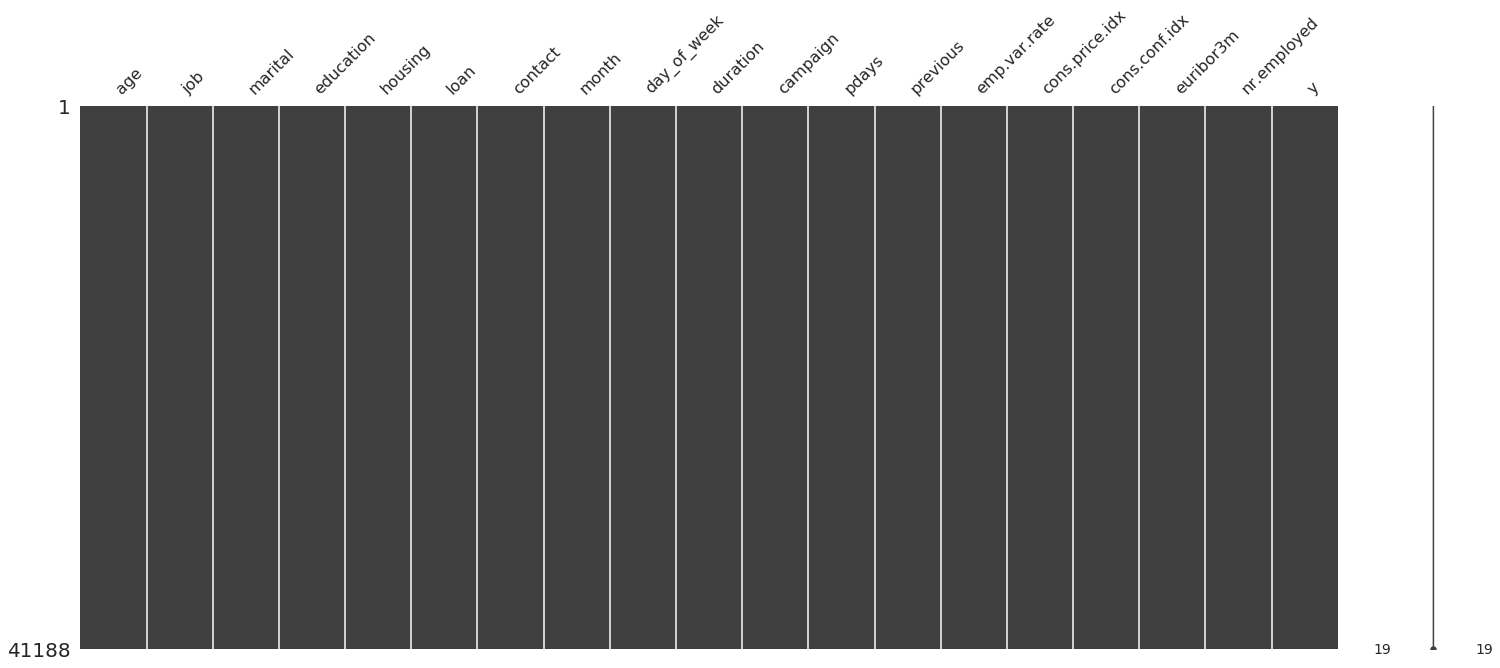

In [23]:
msno.matrix(dsdata3) 
plt.show()

# Feature Selection

In [24]:
dsdata3.shape

(41188, 19)

In [25]:
# Data preparation
dsn = dsdata3.copy()
dsn.describe(include=['O']) 
# Drop missing value
#dsn2 = dsn.copy().dropna() HELL NO!!!!!!! XD, 
# That drops about 10,000 columns...

,job,marital,education,housing,loan,contact,month,day_of_week,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,10,5,2
top,admin.,married,university.degree,yes,no,cellular,may,thu,no
freq,10514,24979,12698,22101,34785,26144,13769,8623,36548


In [26]:
# Create dummy
def make_dummies(dsn):
    numvar = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
    nonnumvar = ['job','marital','education','month','day_of_week'] #WE ONLY NEED THE CATEGORICALS, DONT INCLUDE BINARIES!!

    for c,var in enumerate(nonnumvar):  
        dummy = pd.get_dummies(dsn[var],drop_first=True)
        dsn = dsn.drop(columns=[var])
        dsn = pd.concat([dsn, dummy], axis=1)
        #print(var)
        #display(dummy.head(5))
    return dsn

def make_numeric(dsn):
    for c,var in enumerate(['housing','loan','contact']):
        dsn[var] = dsn[var].astype("category").cat.codes

    return dsn

dsn2 = make_dummies(dsn) #make dummies out of categoricals
dsn2 = make_numeric(dsn2) #make binaries out of yes/no
dsn2.info()
#dsn2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 45 columns):
age                    41188 non-null int64
housing                41188 non-null int8
loan                   41188 non-null int8
contact                41188 non-null int8
duration               41188 non-null int64
campaign               41188 non-null int64
pdays                  41188 non-null int64
previous               41188 non-null int64
emp.var.rate           41188 non-null float64
cons.price.idx         41188 non-null float64
cons.conf.idx          41188 non-null float64
euribor3m              41188 non-null float64
nr.employed            41188 non-null float64
y                      41188 non-null object
blue-collar            41188 non-null uint8
entrepreneur           41188 non-null uint8
housemaid              41188 non-null uint8
management             41188 non-null uint8
retired                41188 non-null uint8
self-employed          41188 non-null uint8
ser

In [27]:
# Drop priori 
dsn3 = dsn2.drop(columns=['duration']) #remove output and duration, which should not be known a priori


In [28]:
# Data Normalization

# separate the data from the target attributes
X = dsn3.drop(columns=['y'])
#Y = pd.get_dummies(dsn3['y'],drop_first=True,dummy_na=True)

# normalize the data attributes
normalized_X = preprocessing.normalize(X)

<Figure size 864x576 with 0 Axes>

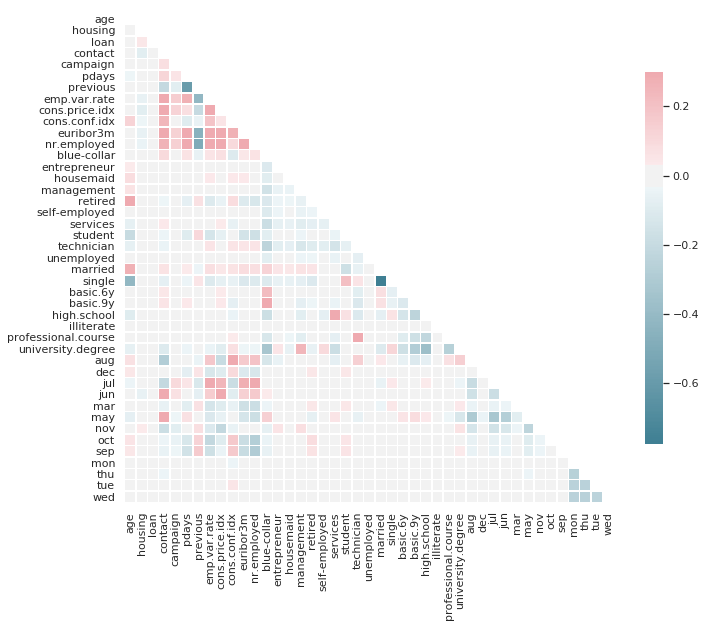

In [29]:
# Check the correlation

plt.figure(figsize=(12,8))
corr = dsn3.corr()
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .76})
plt.show()

## Feature Selection

In [30]:
def print_VIF(X):
    colnames = list(X.columns)
    for i in range(X.shape[1]):
        print(oi.variance_inflation_factor(X.values, i), colnames[i])
        
print("Variance Inflation Factors:")        
print_VIF(X)

Variance Inflation Factors:
25.681918928770706 age
2.1852305855813117 housing
1.1882655441968057 loan
5.168887451435273 contact
1.9404672996641885 campaign
45.31755852429622 pdays
2.0805576192449604 previous
93.70619872074724 emp.var.rate
62409.954474326725 cons.price.idx
389.96722680153994 cons.conf.idx
785.349904884686 euribor3m
80116.51024715738 nr.employed
2.9973820466952845 blue-collar
1.1780905074837515 entrepreneur
1.2077305141098666 housemaid
1.340200970527682 management
1.5427553626117196 retired
1.159412052324687 self-employed
1.562873274739667 services
1.1947822576651597 student
2.0791643736846215 technician
1.1256102349100832 unemployed
6.544924737090439 married
4.028082436352598 single
1.5986898588404959 basic.6y
2.6173874168879685 basic.9y
4.318668169353182 high.school
1.0051318104295233 illiterate
3.0095440041516235 professional.course
5.687953402107749 university.degree
8.135558203776327 aug
1.1411774713805396 dec
5.43694601683232 jul
3.782447169355151 jun
1.25441195811

### intermediate regression on economic variables for VIF

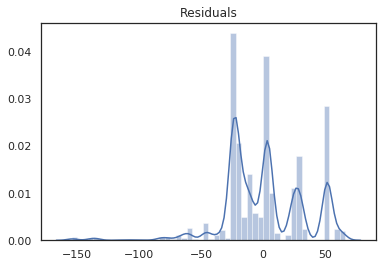

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.623e+08
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        09:58:10   Log-Likelihood:            -2.0167e+05
No. Observations:               41188   AIC:                         4.034e+05
Df Residuals:                   41184   BIC:                         4.034e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -63.3977      0.445   -142.626      0.000     -64.269     -62.526
x2            50.2830      0.027   1890.625      0.000      50.231      50.335
x3            -3.7858      0.038    -99.832      0.000      -3.860      -3.711
x4            86.5789      0.416    208.289      0.000      85.764      87.394
==============================================================================
Omnibus:                     3472.453   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9896.607
Skew:                          -0.464   Prob(JB):                         0.00
Kurtosis:                       5.215   Cond. No.                         387.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
economic = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']
numeric = sm.OLS(X['nr.employed'].values,X[economic].values).fit()
sns.distplot(numeric.resid)
plt.title("Residuals")
plt.show()
display(numeric.summary())

In [32]:
dsn4 = X.copy()
dsn4 = X.drop(columns=['nr.employed','euribor3m','cons.price.idx','cons.conf.idx'])
        
print("Variance Inflation Factors:")        
print_VIF(dsn4)

Variance Inflation Factors:
18.79529080945973 age
2.165890383080135 housing
1.1862809098131633 loan
3.7635968411492096 contact
1.9213582506037719 campaign
27.261948227765917 pdays
1.733136667573659 previous
2.513570297353834 emp.var.rate
2.824170979527265 blue-collar
1.1716789782866037 entrepreneur
1.1919119240823766 housemaid
1.3370865660431073 management
1.5365388475575639 retired
1.155019855858358 self-employed
1.5392169204031363 services
1.16731881478177 student
2.047800094807546 technician
1.1175791165244635 unemployed
6.029220434148891 married
3.5358537678707234 single
1.5292460217489607 basic.6y
2.4046464102427874 basic.9y
3.7523780846364985 high.school
1.0046286195274794 illiterate
2.751723505122119 professional.course
4.85332656486394 university.degree
3.9179586434107003 aug
1.077658860373567 dec
4.410555970417922 jul
3.3575509619221244 jun
1.1876686882672551 mar
6.317522253430888 may
2.5111748964215055 nov
1.2741812199075009 oct
1.2186756956843474 sep
2.051203598467821 mon
2.

In [33]:
# drop maried (signle) option-too correlated
dsn4 = dsn4.drop(columns=['single'])

# day_of_week - not relevant
dsn4 = dsn4.drop(columns=['mon','thu','tue','wed'])

#  poutcome - too correlated
#dsn4 = dsn4.drop(columns=['failure','nonexistent','success'])

# macroeconomic - too correlated & May 2008 to November 2010 not significant
#dsn4 = dsn4.drop(columns=['emp.var.rate', 'euribor3m', 'nr.employed'])

# pdays  - too correlated
dsn4 = dsn4.drop(columns=['pdays'])



<Figure size 864x576 with 0 Axes>

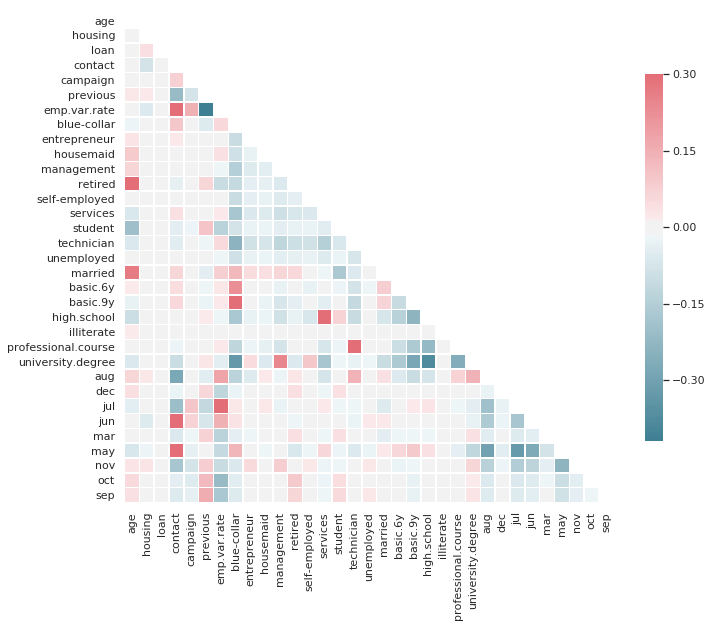

In [34]:
plt.figure(figsize=(12,8))
corr = dsn4.corr()

# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.show()

## Outlier Detection

### PCA 

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
X = dsn4#dsn4.drop(columns=['y'])

#sns.pairplot(X)
# Plot the data
#fig = plt.figure(figsize=(12,8))
#with plt.style.context(('ggplot')):
#    plt.plot( X.T)
#    plt.show()


In [37]:
pcaX = PCA().fit_transform(X)#.fit_transform(StandardScaler().fit_transform(X))
# PCA & score 

In [38]:
# Compute the euclidean distance ( 3 PC )
euclidean = np.zeros(X.shape[0])
for i in range(3):
    euclidean += (pcaX[:,i] - np.mean(pcaX[:,:3]))**2/np.var(pcaX[:,:3])
    
#colors = [plt.cm.jet(float(i)/max(euclidean)) for i in euclidean]


In [39]:
X_pca = pd.DataFrame(pcaX, columns=['PCA%i' % i for i in range(X.shape[1])], index=X.index)

In [40]:
colors = ["blue", "blue"]
pal = sns.xkcd_palette(colors)

pal = [sns.cubehelix_palette(light=1)[1], sns.cubehelix_palette(light=1)[4]]

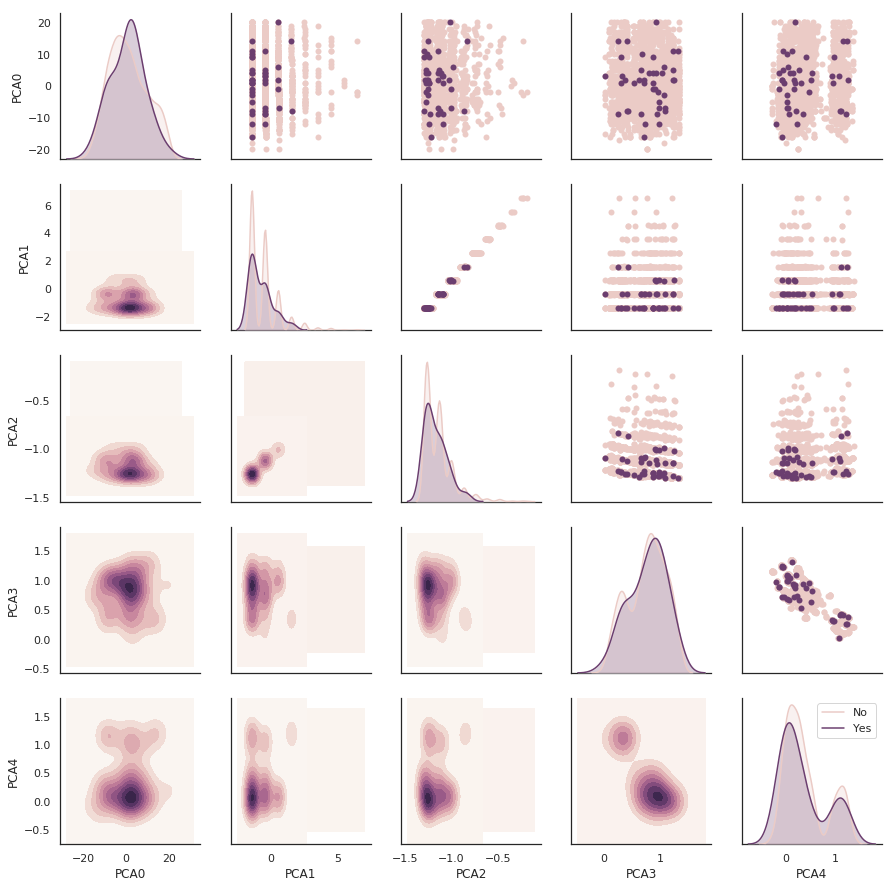

In [41]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)


df = X_pca.copy()
df['y']  = dsdata['y']
df = df[['PCA0','PCA1','PCA2','PCA3','PCA4','y']]
df = df.iloc[:2000]
g = sns.PairGrid(df, diag_sharey=False, hue='y', palette=pal)
g.map_lower(sns.kdeplot, cmap=cmap, shade=True)
g.map_upper(sns.scatterplot, linewidth=0)
g.map_diag(sns.kdeplot, shade=True)
plt.legend(['No','Yes'])
plt.show()

In [42]:
'''
colors = [plt.cm.jet(float(i)/max(euclidean)) for i in euclidean]
fig = plt.figure(figsize=(8,6))
with plt.style.context(('ggplot')):
    plt.scatter(pcaX[:, 0], pcaX[:, 1], c=colors, edgecolors='k')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Score Plot')
plt.show()
'''
a = 0

### Z-score

In [43]:
#NORMALIZATION????

In [44]:
from scipy import stats

dsn5 = dsn4.copy()

zX = np.abs(stats.zscore(X))




In [45]:
X.shape

(41188, 33)

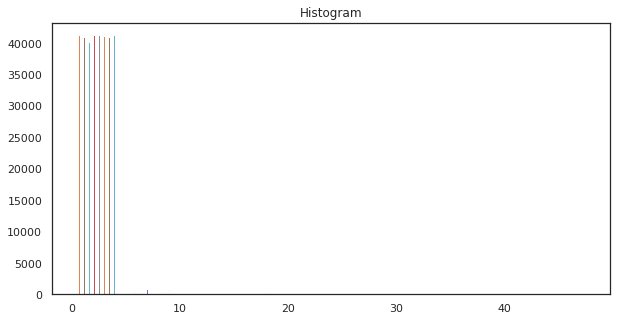

In [46]:
def histogram(variable):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram")
    ax = plt.hist(zX)

histogram(zX)

In [47]:
dsn5 = dsn5[(zX < 10).all(axis=1)]
dsn5 = dsn5.drop(columns = ['dec','illiterate'])
dsn5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 41187
Data columns (total 31 columns):
age                    40949 non-null int64
housing                40949 non-null int8
loan                   40949 non-null int8
contact                40949 non-null int8
campaign               40949 non-null int64
previous               40949 non-null int64
emp.var.rate           40949 non-null float64
blue-collar            40949 non-null uint8
entrepreneur           40949 non-null uint8
housemaid              40949 non-null uint8
management             40949 non-null uint8
retired                40949 non-null uint8
self-employed          40949 non-null uint8
services               40949 non-null uint8
student                40949 non-null uint8
technician             40949 non-null uint8
unemployed             40949 non-null uint8
married                40949 non-null uint8
basic.6y               40949 non-null uint8
basic.9y               40949 non-null uint8
high.school 

In [48]:
X = dsn5#.drop(columns=['y'])
Y = dsdata['y'][X.index].astype("category").cat.codes

# Prediction

In [49]:
sns.set_style('whitegrid')

Distribution of OLS residuals


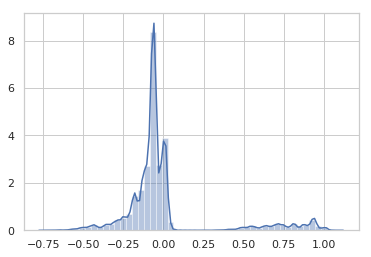

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     222.8
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        09:58:28   Log-Likelihood:                -7488.6
No. Observations:               40949   AIC:                         1.504e+04
Df Residuals:                   40917   BIC:                         1.532e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0856      0.012      7.384      0.000       0.063       0.108
x1             0.0003      0.000      1.702      0.089   -4.32e-05       0.001
x2            -0.0043      0.003     -1.493      0.135      -0.010       0.001
x3            -0.0033      0.004     -0.832      0.406      -0.011       0.004
x4             0.0288      0.005      6.185      0.000       0.020       0.038
x5            -0.0035      0.001     -6.283      0.000      -0.005      -0.002
x6             0.0686      0.003     20.839      0.000       0.062       0.075
x7            -0.0528      0.001    -36.002      0.000      -0.056      -0.050
x8            -0.0203      0.005     -3.885      0.000      -0.030      -0.010
x9            -0.0191      0.008     -2.312      0.021      -0.035      -0.003
x10           -0.0061      0.010     -0.624      0.533      -0.025       0.013
x11           -0.0124      0.006     -1.988      0.047      -0.025      -0.000
x12            0.0459      0.009      5.259      0.000       0.029       0.063
x13           -0.0139      0.008     -1.682      0.093      -0.030       0.002
x14           -0.0182      0.006     -3.163      0.002      -0.029      -0.007
x15            0.0777      0.011      7.228      0.000       0.057       0.099
x16           -0.0085      0.005     -1.670      0.095      -0.019       0.001
x17            0.0042      0.010      0.434      0.664      -0.015       0.023
x18           -0.0034      0.003     -1.066      0.286      -0.010       0.003
x19            0.0035      0.008      0.469      0.639      -0.011       0.018
x20           -0.0066      0.006     -1.108      0.268      -0.018       0.005
x21           -0.0005      0.006     -0.081      0.935      -0.012       0.011
x22            0.0077      0.007      1.128      0.259      -0.006       0.021
x23            0.0119      0.006      1.935      0.053      -0.000       0.024
x24            0.0494      0.008      6.365      0.000       0.034       0.065
x25            0.0676      0.008      8.740      0.000       0.052       0.083
x26            0.0342      0.008      4.455      0.000       0.019       0.049
x27            0.2778      0.014     20.257      0.000       0.251       0.305
x28           -0.0495      0.007     -7.526      0.000      -0.062      -0.037
x29           -0.0274      0.008     -3.634      0.000      -0.042      -0.013
x30            0.1580      0.012     12.757      0.000       0.134       0.182
x31            0.1710      0.014     12.593      0.000       0.144       0.198
==============================================================================
Omnibus:                    16008.805   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54080.593
Skew:                           2.043   Prob(JB):                         0.00
Ku

In [50]:
X_ = sm.add_constant(X)
model = sm.OLS(Y.values,X_.values).fit()

print("Distribution of OLS residuals")
sns.distplot(model.resid)
plt.show()
display(model.summary())


In [51]:
alpha = 0.05
a = model.pvalues < alpha

X2 = X_[X_.columns[a]]
X2 = sm.add_constant(X2)
print("Not Statistically significant regressors are:")
print(list(X_.columns[~a]))

Not Statistically significant regressors are:
['age', 'housing', 'loan', 'housemaid', 'self-employed', 'technician', 'unemployed', 'married', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']


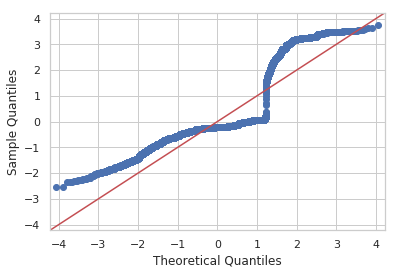

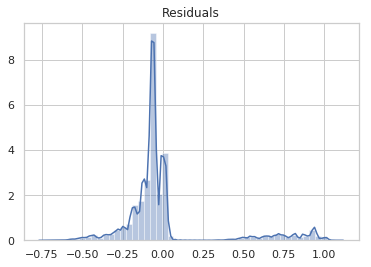

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     188.5
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        09:58:29   Log-Likelihood:                -7502.3
No. Observations:               40949   AIC:                         1.504e+04
Df Residuals:                   40930   BIC:                         1.521e+04
Df Model:                          18                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0936      0.009     10.393      0.000       0.076       0.111
x1             0.0294      0.006      5.287      0.000       0.018       0.040
x2            -0.0035      0.000     -8.894      0.000      -0.004      -0.003
x3             0.0688      0.005     13.467      0.000       0.059       0.079
x4            -0.0531      0.002    -25.650      0.000      -0.057      -0.049
x5            -0.0237      0.003     -7.027      0.000      -0.030      -0.017
x6            -0.0158      0.007     -2.140      0.032      -0.030      -0.001
x7            -0.0055      0.006     -0.951      0.342      -0.017       0.006
x8             0.0519      0.010      5.245      0.000       0.032       0.071
x9            -0.0201      0.005     -4.252      0.000      -0.029      -0.011
x10            0.0755      0.015      5.000      0.000       0.046       0.105
x11            0.0514      0.011      4.795      0.000       0.030       0.072
x12            0.0677      0.010      6.501      0.000       0.047       0.088
x13            0.0342      0.010      3.406      0.001       0.015       0.054
x14            0.2794      0.023     12.311      0.000       0.235       0.324
x15           -0.0503      0.009     -5.816      0.000      -0.067      -0.033
x16           -0.0268      0.010     -2.811      0.005      -0.046      -0.008
x17            0.1589      0.021      7.688      0.000       0.118       0.199
x18            0.1728      0.023      7.635      0.000       0.128       0.217
==============================================================================
Omnibus:                    16022.909   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54154.258
Skew:                           2.045   Prob(JB):                         0.00
Kurtosis:                       6.874   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

Variance Inflation Factors:
21.138414376663768 const
2.423069795095018 contact
1.0356138405420676 campaign
1.2461359426749499 previous
2.526474179306456 emp.var.rate
1.1762621116496645 blue-collar
1.042618004973412 entrepreneur
1.0692695014611933 management
1.0611944755477523 retired
1.097258503496087 services
1.0476580591921607 student
3.718382586252366 aug
4.160612141445617 jul
3.2062619568991346 jun
1.1977471584357817 mar
4.659885324202544 may
2.469614127812346 nov
1.2793116696423477 oct
1.2252082324442302 sep


In [52]:
model2 = sm.OLS(Y.values,X2.values).fit(cov_type='HC0')
sm.qqplot(model2.resid, sc.norm, fit=True, line='45')
plt.show()
sns.distplot(model2.resid)
plt.title('Residuals')
plt.show()
display(model2.summary())
print("Variance Inflation Factors:")
print_VIF(X2)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X2.values, Y.values, test_size=0.25)

reg = LinearRegression()
reg = reg.fit(X_train,Y_train)

y_hat = reg.predict(X_test)

print('Test accuracy:',np.round(reg.score(np.round(X_test), Y_test),3), ', MSE Loss is:', mean_squared_error(Y_test,y_hat))

Test accuracy: 0.152 , MSE Loss is: 0.08469230289535609


# Classification

In [54]:
def plot_hist2(df,df2,df_col):
    df = df.dropna()  
    df2 = df2.dropna() 
    for d in df_col:
        print("Empirical Distribution of Variable "+d)
        fig, axes = plt.subplots(1,2,figsize=(15,9))
        sns.distplot(df[d],ax=axes[0])
        sns.distplot(df2[d],ax=axes[1])
        axes[0].set_ylabel("Probability")
        axes[1].set_ylabel("Probability")
        plt.suptitle("Empirical Probability Distribution of Numerical Variable "+d)
        plt.show()
        
def get_num_cols(df):
    idx = df.select_dtypes(exclude='object').columns.values
    dF = df[idx].dropna() #remove NaNs or else it cant plot
    return dF.columns

def calculate_metrics(y_test,y_hat):
    c = confusion_matrix(y_test, y_hat)
    print("Confusion matrix is:")
    print(c)
    print("We have",c[0][0]+c[1][1],"correct observations and",c[0][1]+c[1][0], "misclassifications.")
    print(classification_report(y_test, y_hat))
    sns.heatmap(c,cmap="YlGnBu",annot=True)
    plt.show()
    
def plot_ROC(y_test,X_test,classifier):
    roc = roc_auc_score(y_test, classifier.predict(X_test))
    fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
    plt.figure(figsize=(7,7))
    plt.plot(fpr, tpr, label='Classifier area ='+str(np.round(roc,2)))
    plt.plot([0, 1], [0, 1],'--')

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend()

    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.show()
    
    
def plot_ROC2(L_Y,L_X,L_YHAT,L_PROB,L_NAME):
    
    plt.figure(figsize=(7,7))
    for i in range(len(L_Y)):
        roc = roc_auc_score(L_Y[i], L_YHAT[i])
        fpr, tpr, _ = roc_curve(L_Y[i], L_PROB[i][:,1])
        plt.plot(fpr, tpr, label=L_NAME[i]+', area ='+str(np.round(roc,2)))
    plt.plot([0, 1], [0, 1],'--')

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend()

    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.show()
    
    
def MAE(y_test,y_hat):
    return np.abs(y_test-y_hat).sum()#/y_test.shape[0]


## Logistic Regression with PCA

In [55]:
pcaXmodel = PCA(n_components=5, whiten=True)
pc = pcaXmodel.fit_transform(X)#.fit_transform(StandardScaler().fit_transform(X))
print(pcaXmodel.explained_variance_ratio_[:5])

proj = pcaXmodel.inverse_transform(pc)
a = pd.DataFrame(proj)[list(np.ones((5,1)).cumsum().ravel())]

X_train, X_test, y_train, y_test = train_test_split(a, Y, test_size=0.3,  random_state=0)
lr = LogisticRegression().fit(X_train,y_train)

y_hat = lr.predict(X_test)
print('Test accuracy:',np.round(lr.score(X_test, y_test),3), ', Cross Entropy Loss is:', log_loss(y_test,y_hat))
print(MAE(y_test,y_hat))

#pcaXmodel = PCA(n_components=5).fit_transform(X)#.fit_transform(StandardScaler().fit_transform(X))

[0.89682794 0.05748249 0.02049603 0.00333255 0.00236168]
Test accuracy: 0.888 , Cross Entropy Loss is: 3.8573225568251446
1372


Confusion matrix is:
[[10894     8]
 [ 1364    19]]
We have 10913 correct observations and 1372 misclassifications.
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10902
           1       0.70      0.01      0.03      1383

   micro avg       0.89      0.89      0.89     12285
   macro avg       0.80      0.51      0.48     12285
weighted avg       0.87      0.89      0.84     12285



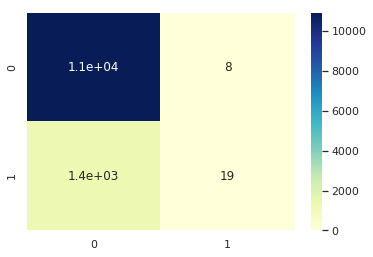

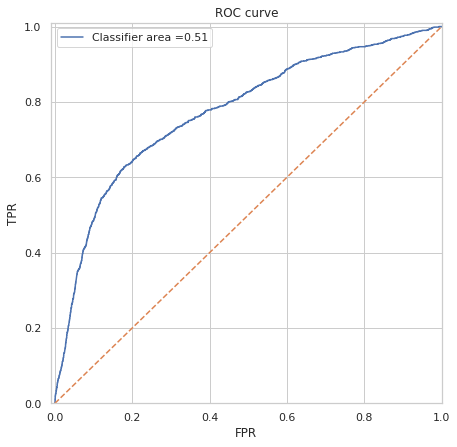

In [56]:
calculate_metrics(y_test,y_hat)
plot_ROC(y_test,X_test,lr)

In [57]:
logit = sm.Logit(Y.values, a.values).fit()
display(logit.summary())    

Optimization terminated successfully.
         Current function value: 0.299582
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                40949
Model:                          Logit   Df Residuals:                    40944
Method:                           MLE   Df Model:                            4
Date:                Wed, 08 May 2019   Pseudo R-squ.:                  0.1404
Time:                        09:58:30   Log-Likelihood:                -12268.
converged:                       True   LL-Null:                       -14272.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -3.0997      0.357     -8.676      0.000      -3.800      -2.399
x2            -3.3670      1.457     -2.312      0.021      -6.222      -0.512
x3            -1.8759      0.098    -19.132      0.000      -2.068      -1.684
x4            -0.0359      0.010     -3.755      0.000      -0.055      -0.017
x5             2.7777      0.091     30.556      0.000       2.599       2.956
==============================================================================
"""

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.25)

In [59]:
# Try
%%script false

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

for c,var in enumerate(classifiers):
    clf = var
    clf = clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    print(c,var,"Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
    print('\n')

UsageError: Line magic function `%%script` not found.


### AdaBoost Classifier

Test accuracy: 0.892 , Cross Entropy Loss is: 3.744692726778441
Confusion matrix is:
[[8996  153]
 [ 957  132]]
We have 9128 correct observations and 1110 misclassifications.
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9149
           1       0.46      0.12      0.19      1089

   micro avg       0.89      0.89      0.89     10238
   macro avg       0.68      0.55      0.57     10238
weighted avg       0.86      0.89      0.86     10238



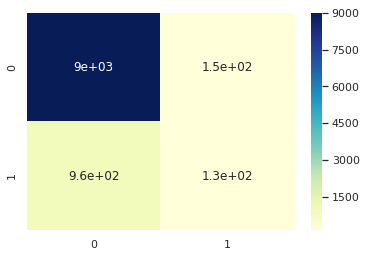

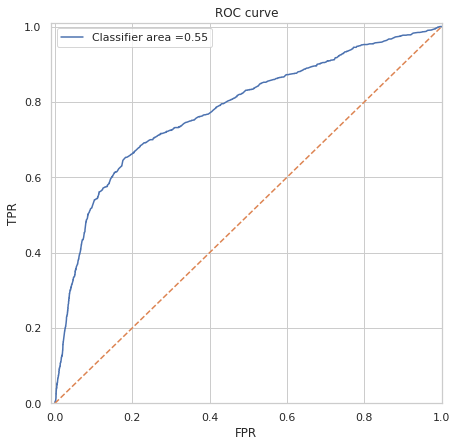

1110

In [60]:
clf_rdfore = AdaBoostClassifier()
clf_rdfore = clf_rdfore.fit(X_train,Y_train)

y_hat = clf_rdfore.predict(X_test)


print('Test accuracy:',np.round(clf_rdfore.score(X_test, Y_test),3), ', Cross Entropy Loss is:', log_loss(Y_test,y_hat))
calculate_metrics(Y_test,y_hat)
plot_ROC(Y_test,X_test,clf_rdfore)
MAE(Y_test,y_hat)

### SVC 

In [61]:
%% script false
clf_rdfore = SVC(probability=True)
clf_rdfore = clf_rdfore.fit(X_train,Y_train)

y_hat = clf_rdfore.predict(X_test)


print('Test accuracy:',np.round(clf_rdfore.score(X_test, Y_test),3), ', Cross Entropy Loss is:', log_loss(Y_test,y_hat))
calculate_metrics(Y_test,y_hat)
plot_ROC(Y_test,X_test,clf_rdfore)



UsageError: Cell magic `%%` not found.


# Unbalanced Data Problem

In [162]:
sns.set_style('whitegrid')

In [163]:
def make_balanced(X,Y):
    DF = X.copy()
    DF['Y'] = Y
    DF_Yes = DF[DF.Y==1]#.info()
    DF_No = DF[DF.Y==0]#.info()
    DF_B = DF_No.sample(len(DF_Yes))
    D = pd.concat([DF_B,DF_Yes])
    D = D.reindex(np.random.permutation(D.index))
    D = D[:int(len(D)/2)]#, D[int(len(D)/2):]
    return D

In [164]:
D = make_balanced(X,Y)

In [165]:
D.shape

(4544, 32)

In [166]:
X_B = D.drop(columns='Y')
Y_B = D['Y']

Test accuracy: 0.745 , Cross Entropy Loss is: 8.817195343168
Confusion matrix is:
[[497 111]
 [179 349]]
We have 846 correct observations and 290 misclassifications.
              precision    recall  f1-score   support

           0       0.74      0.82      0.77       608
           1       0.76      0.66      0.71       528

   micro avg       0.74      0.74      0.74      1136
   macro avg       0.75      0.74      0.74      1136
weighted avg       0.75      0.74      0.74      1136



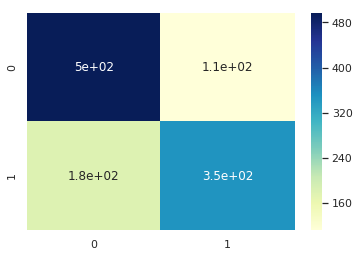

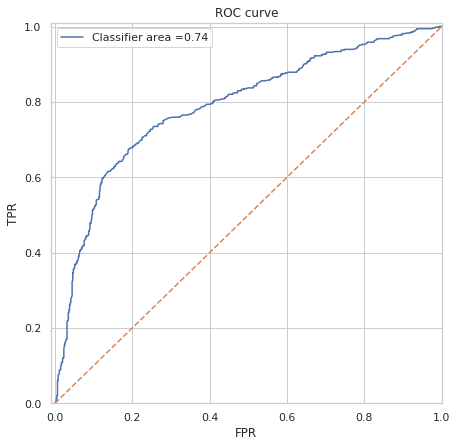

290

In [167]:
X_train, X_test, Y_train, Y_test = train_test_split(X_B.values, Y_B.values, test_size=0.25)
clf_rdfore = AdaBoostClassifier()
clf_rdfore = clf_rdfore.fit(X_train,Y_train)

y_hat = clf_rdfore.predict(X_test)


print('Test accuracy:',np.round(clf_rdfore.score(X_test, Y_test),3), ', Cross Entropy Loss is:', log_loss(Y_test,y_hat))
calculate_metrics(Y_test,y_hat)
plot_ROC(Y_test,X_test,clf_rdfore)
MAE(Y_test,y_hat)

In [170]:
X_R = X.drop(D.index)
Y_R = Y.drop(D.index)

Test accuracy: 0.802 , Cross Entropy Loss is: 6.850972189554636
Confusion matrix is:
[[27673  6426]
 [  795  1511]]
We have 29184 correct observations and 7221 misclassifications.
              precision    recall  f1-score   support

           0       0.97      0.81      0.88     34099
           1       0.19      0.66      0.30      2306

   micro avg       0.80      0.80      0.80     36405
   macro avg       0.58      0.73      0.59     36405
weighted avg       0.92      0.80      0.85     36405



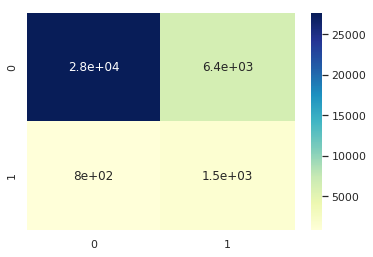

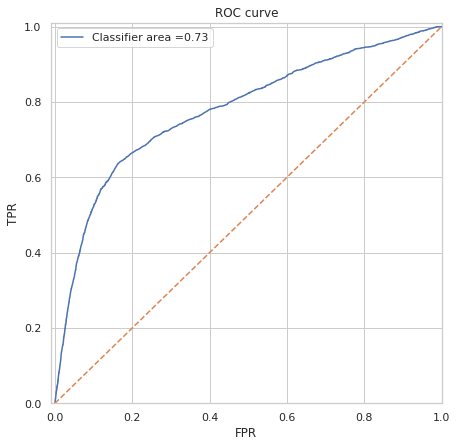

0    34099
1     2306
dtype: int64


In [172]:
#XB_train, XB_test, YB_train, YB_test = train_test_split(X_B.values, Y_B.values, test_size=0.25)

ada = AdaBoostClassifier()
ada = ada.fit(X_B,Y_B)

y_hat = ada.predict(X_R)


print('Test accuracy:',np.round(ada.score(X_R, Y_R),3), ', Cross Entropy Loss is:', log_loss(Y_R,y_hat))
calculate_metrics(Y_R,y_hat)
plot_ROC(Y_R,X_R,ada)
MAE(Y_R,y_hat)
print(Y_R.value_counts())

## Test Over/Under Sampling Methods

In [130]:
def plot_ROC2(L_Y,L_X,L_YHAT,L_PROB,L_NAME):
    
    plt.figure(figsize=(7,7))
    for i in range(len(L_Y)):
        roc = roc_auc_score(L_Y[i], L_YHAT[i])
        fpr, tpr, _ = roc_curve(L_Y[i], L_PROB[i][:,1])
        plt.plot(fpr, tpr, label=L_NAME[i]+', area ='+str(np.round(roc,2)))
    plt.plot([0, 1], [0, 1],'--')

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend()

    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.show()


In [134]:
c = StratifiedKFold(n_splits=3)


classifier = ['AdaBoost', AdaBoostClassifier()]

over_samplers = [
    ['ADA-SYN', ADASYN()],
    ['ROS', RandomOverSampler()],
    ['SMOTE', SMOTE()],
]

under_samplers = [
    #['Centroids', ClusterCentroids()],
    ['RUS', RandomUnderSampler()],
    ['IHT', InstanceHardnessThreshold()],
    ['RENN', RepeatedEditedNearestNeighbours()],
    #['NCR', NeighbourhoodCleaningRule()],
]

over_pipelines = [
    ['{}-{}'.format(s[0], classifier[0]),
     make_pipeline(s[1], classifier[1])]
    for s in over_samplers
]

under_pipelines = [
    ['{}-{}'.format(s[0], classifier[0]),
     make_pipeline(s[1], classifier[1])]
    for s in under_samplers
]

def calc_sampling(pipelines,X,Y):
    L_NAME, L_X, L_Y, L_YHAT, L_PROB = [],[],[],[],[]
    for name, pipeline in pipelines:
        for i, (train, test) in enumerate(c.split(X.values, Y.values)):
            if i == 0:
                probs = pipeline.fit(X.values[train], Y.values[train]).predict_proba(X.values[test])
                y_hat = pipeline.fit(X.values[train], Y.values[train]).predict(X.values[test])
                #fpr, tpr, thresholds = roc_curve(Y.values[test], probs[:, 1])
                
                print(name)
                calculate_metrics(Y.values[test],y_hat)
                #plot_ROC2(Y.values[test],X.values[test],y_hat,probs)
                L_NAME.append(name)
                L_X.append(X.values[test])
                L_Y.append(Y.values[test])
                L_YHAT.append(y_hat)
                L_PROB.append(probs)

    plot_ROC2(L_Y,L_X,L_YHAT,L_PROB,L_NAME)

ADA-SYN-AdaBoost
Confusion matrix is:
[[12135     0]
 [ 1422    93]]
We have 12228 correct observations and 1422 misclassifications.
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     12135
           1       1.00      0.06      0.12      1515

   micro avg       0.90      0.90      0.90     13650
   macro avg       0.95      0.53      0.53     13650
weighted avg       0.91      0.90      0.85     13650



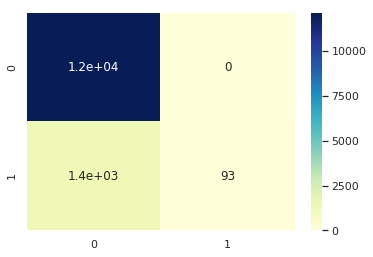

ROS-AdaBoost
Confusion matrix is:
[[12135     0]
 [ 1344   171]]
We have 12306 correct observations and 1344 misclassifications.
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12135
           1       1.00      0.11      0.20      1515

   micro avg       0.90      0.90      0.90     13650
   macro avg       0.95      0.56      0.58     13650
weighted avg       0.91      0.90      0.86     13650



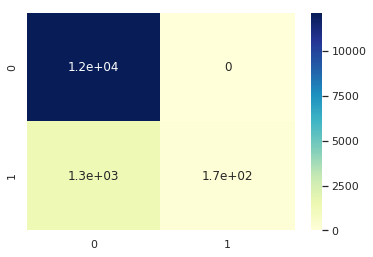

SMOTE-AdaBoost
Confusion matrix is:
[[12135     0]
 [ 1416    99]]
We have 12234 correct observations and 1416 misclassifications.
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     12135
           1       1.00      0.07      0.12      1515

   micro avg       0.90      0.90      0.90     13650
   macro avg       0.95      0.53      0.53     13650
weighted avg       0.91      0.90      0.85     13650



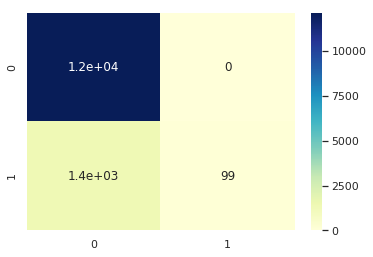

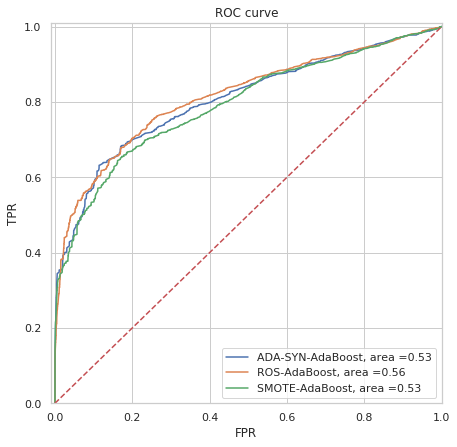

In [135]:
calc_sampling(over_pipelines,X,Y)

RUS-AdaBoost
Confusion matrix is:
[[12135     0]
 [ 1340   175]]
We have 12310 correct observations and 1340 misclassifications.
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12135
           1       1.00      0.12      0.21      1515

   micro avg       0.90      0.90      0.90     13650
   macro avg       0.95      0.56      0.58     13650
weighted avg       0.91      0.90      0.87     13650



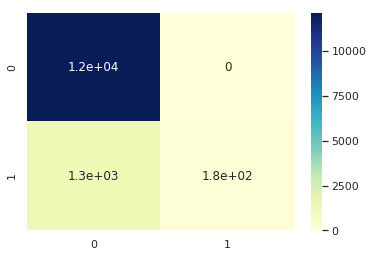

IHT-AdaBoost
Confusion matrix is:
[[12135     0]
 [ 1106   409]]
We have 12544 correct observations and 1106 misclassifications.
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     12135
           1       1.00      0.27      0.43      1515

   micro avg       0.92      0.92      0.92     13650
   macro avg       0.96      0.63      0.69     13650
weighted avg       0.93      0.92      0.90     13650



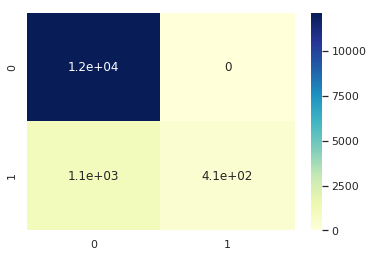

RENN-AdaBoost
Confusion matrix is:
[[12135     0]
 [ 1364   151]]
We have 12286 correct observations and 1364 misclassifications.
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12135
           1       1.00      0.10      0.18      1515

   micro avg       0.90      0.90      0.90     13650
   macro avg       0.95      0.55      0.56     13650
weighted avg       0.91      0.90      0.86     13650



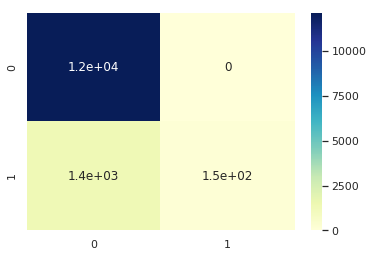

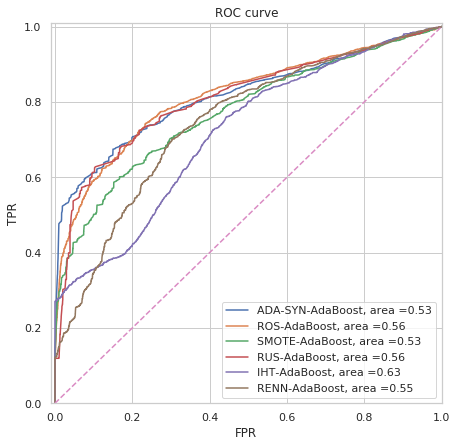

In [133]:
calc_sampling(under_pipelines,X,Y)

## Final Test of Classifiers

In [173]:

    
def plot_ROC3(L_Y,L_X,L_CLASS,L_NAME):
    
    plt.figure(figsize=(7,7))
    for i in range(len(L_Y)):
        roc = roc_auc_score(L_Y[i], L_CLASS[i].predict(L_X))
        
        fpr, tpr, _ = roc_curve(L_Y[i], L_CLASS[i].predict_proba(L_X)[:,1])
        plt.plot(fpr, tpr, label=L_NAME[i]+', area ='+str(np.round(roc,2)))
    plt.plot([0, 1], [0, 1],'--')

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend()

    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.show()

Test accuracy: 0.778 , Cross Entropy Loss is: 7.682085733277374
Confusion matrix is:
[[26772  7327]
 [  770  1536]]
We have 28308 correct observations and 8097 misclassifications.
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     34099
           1       0.17      0.67      0.28      2306

   micro avg       0.78      0.78      0.78     36405
   macro avg       0.57      0.73      0.57     36405
weighted avg       0.92      0.78      0.83     36405



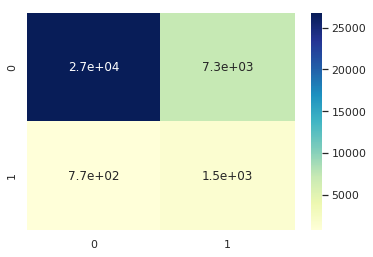

MAE: 8097
Test accuracy: 0.802 , Cross Entropy Loss is: 6.850972189554636
Confusion matrix is:
[[27673  6426]
 [  795  1511]]
We have 29184 correct observations and 7221 misclassifications.
              precision    recall  f1-score   support

           0       0.97      0.81      0.88     34099
           1       0.19      0.66      0.30      2306

   micro avg       0.80      0.80      0.80     36405
   macro avg       0.58      0.73      0.59     36405
weighted avg       0.92      0.80      0.85     36405



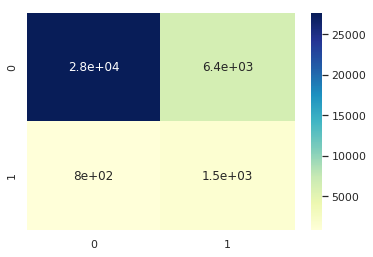

MAE: 7221
Test accuracy: 0.72 , Cross Entropy Loss is: 9.682068521862025
Confusion matrix is:
[[24730  9369]
 [  836  1470]]
We have 26200 correct observations and 10205 misclassifications.
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     34099
           1       0.14      0.64      0.22      2306

   micro avg       0.72      0.72      0.72     36405
   macro avg       0.55      0.68      0.53     36405
weighted avg       0.91      0.72      0.79     36405



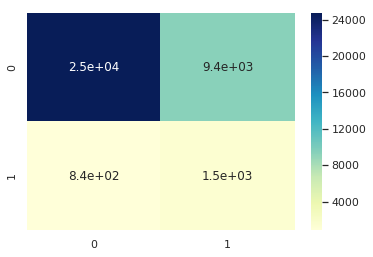

MAE: 10205
Test accuracy: 0.74 , Cross Entropy Loss is: 8.989473327369838
Confusion matrix is:
[[25507  8592]
 [  883  1423]]
We have 26930 correct observations and 9475 misclassifications.
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     34099
           1       0.14      0.62      0.23      2306

   micro avg       0.74      0.74      0.74     36405
   macro avg       0.55      0.68      0.54     36405
weighted avg       0.91      0.74      0.80     36405



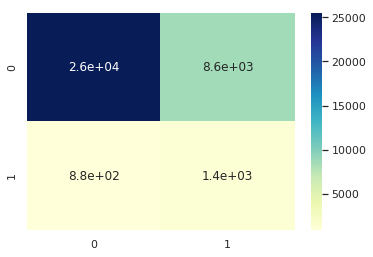

MAE: 9475


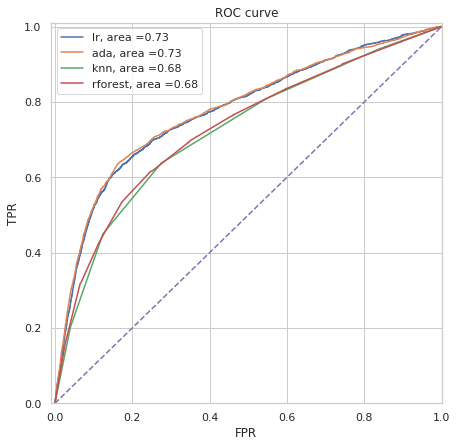

In [179]:
C = [LogisticRegression(), AdaBoostClassifier(), KNeighborsClassifier(), RandomForestClassifier()]
L_NAME = ['lr','ada','knn','rforest']
L_X, L_Y, L_YHAT, L_PROB = [],[],[],[]

for cl in C:
    c = cl.fit(X_B,Y_B)

    y_hat = c.predict(X_R)
    probs = c.predict_proba(X_R)

    print('Test accuracy:',np.round(c.score(X_R, Y_R),3), ', Cross Entropy Loss is:', log_loss(Y_R,y_hat))
    calculate_metrics(Y_R,y_hat)
    #plot_ROC(Y_R,X,c)
    print('MAE:',MAE(Y_R,y_hat))
    
                    #L_NAME.append(name)
    L_X.append(X_R.values)
    L_Y.append(Y_R.values)
    L_YHAT.append(y_hat)
    L_PROB.append(probs)

plot_ROC2(L_Y,L_X,L_YHAT,L_PROB,L_NAME)

#plot_ROC3(L_Y,L_X,L_CLASS,L_NAME)
L_X, L_Y, L_YHAT, L_CLASS, l_NAME = [],[],[],[],[]